In [10]:
import json
import matplotlib.pyplot as plt
import plotly.express as px
from typing import Iterable
from langchain.docstore.document import Document

corpus_filename = '../data/processed/corpus.jsonl'

# Helper functions
def load_docs_from_jsonl(file_path) -> Iterable[Document]:
    docs = []
    with open(file_path, 'r') as jsonl_file:
        for line in jsonl_file:
            data = json.loads(line)
            obj = Document(**data)
            docs.append(obj)
    return docs

# load corpus
corpus = load_docs_from_jsonl(corpus_filename)

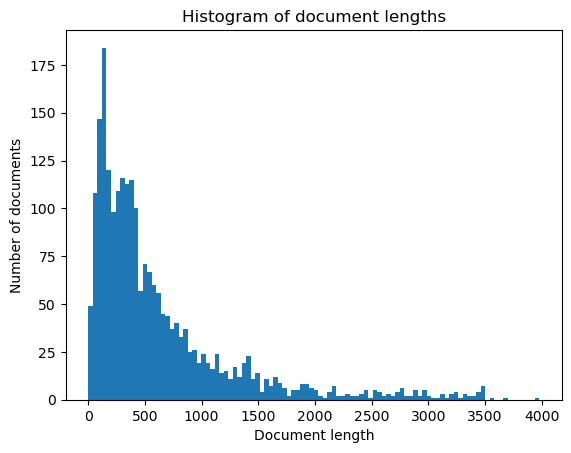

In [11]:
# histogram of document lengths
doc_lengths = [len(doc.page_content) for doc in corpus]
plt.hist(doc_lengths, bins=100)
plt.title('Histogram of document lengths')
plt.xlabel('Document length')
plt.ylabel('Number of documents')
plt.show()

In [ ]:
# print chuncks >4000 characters
for doc in corpus:
    if len(doc.page_content) > 3500:
        print(doc.metadata, doc.page_content)
        print('-------------------------')
        print('-------------------------')
        print('-------- END ------------')

In [ ]:
# print documents where Modulkuerzel is unknown
for doc in corpus:
    if doc.metadata.get('Modulkuerzel') == 'unknown':
        print(doc.metadata, doc.page_content)
        print('-------------------------')
        print('-------------------------')
        print('-------- END ------------')

In [20]:
modulkuerzel = [doc.metadata.get('Modul', doc.metadata.get('source', 'NA')) for doc in corpus]

fig = px.histogram(x=modulkuerzel, nbins=100)
fig.update_layout(
    title='Number of documents per Module/Source File',
    xaxis_title='Document Length',
    yaxis_title='Number of Documents',
    xaxis={'categoryorder':'total descending'}
)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=90)

fig.show()